Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
import pickle
import os
import glob
import seaborn as sns
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn import preprocessing
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score,StratifiedKFold
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [11]:
pip install xgboost==0.90

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


Collecting and merging the Data


In [2]:
i = 1
frames = []
for name in os.listdir('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'):
    extents = os.path.splitext('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'+'/{}'.format(name))[1].lower()
    if extents == '.csv':
        df = pd.read_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        print({name},df.columns[-1], df.shape)
        frames.append(df)
    if extents == '.xlsx':
        df= pd.read_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        df.columns = df.columns.astype(str)
        frames.append(df)
        print({name},df.shape, df.columns[-1], df.shape)

result =  pd.concat(frames, axis=0, ignore_index= False)

{'27-06-2022-09-57-30.csv'} Unnamed: 1059 (24, 1060)
{'06-07-2022-10-28-51.csv'} Unnamed: 1059 (200, 1060)
{'29-06-2022-02-45-53.csv'} Unnamed: 1059 (16, 1060)
{'24-06-2022-10-27-46.csv'} Unnamed: 1059 (72, 1060)
{'29-06-2022-02-00-08.csv'} Unnamed: 1059 (48, 1060)
{'06-07-2022-03-02-53.csv'} Unnamed: 1059 (90, 1060)
{'21-06-2022-01-05-54.csv'} Unnamed: 1059 (78, 1060)
{'17-06-2022-09-15-43.csv'} Unnamed: 1059 (191, 1060)
{'20-06-2022-09-28-42.csv'} 985.082 (132, 1059)
{'05-07-2022-09-46-06.csv'} Unnamed: 1059 (224, 1060)
{'06-06-2022-01-18-32.csv'} Unnamed: 1059 (224, 1060)
{'24-06-2022-10-04-49.csv'} Unnamed: 1059 (18, 1060)
{'01-07-2022-10-40-27.csv'} Unnamed: 1059 (160, 1060)
{'15-06-2022-11-41-28.csv'} Unnamed: 1059 (42, 1060)
{'04-07-2022-10-06-05.csv'} Unnamed: 1059 (162, 1060)
{'15-06-2022-09-22-29.csv'} Unnamed: 1059 (142, 1060)
{'24-06-2022-11-09-58.csv'} Unnamed: 1059 (154, 1060)
{'12-07-2022-02-03-29.csv'} Unnamed: 1059 (256, 1060)
{'05-07-2022-02-13-13.csv'} Unnamed: 1059 

In [3]:
result.rename(columns = {' ': 'Output'}, inplace=True)

In [4]:
result_3 =result.loc[:,'Output']
result_2= result.loc[:,'195.462':'985.082']
result_1= result.iloc[:,1:14]

In [5]:
print(result_2.shape, result_3.shape)

(8064, 1044) (8064,)


In [6]:
df = pd.concat([result_2,result_3], axis=1)

In [18]:
# df.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/whole_data.xlsx')

Data preprocessing

In [7]:
df_without_calb = df[~df['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]
df_without_calb.reset_index()
df_without_calb['w/f']= df_without_calb['Output'].str.split('_').str[0]

In [8]:
df_with_w = df_without_calb[df_without_calb['w/f'] == 'W']


In [10]:
df_with_w['quality'] = df_with_w['Output'].str.split('_').str[3]
df_with_w['quality'].replace({'brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)

df_with_w['color'] = df_with_w['Output'].str.split('_').str[2]
df_with_w['color'].replace({'J/LB':'J','H/BLK':'H','E/LB':'E','H/LB':'H','J/LB':'J','I/LB':'I','J ':'J','F/LB':'F','G/LB':'G','E LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)


In [22]:
df_without_calb['quality'] = df_without_calb['Output'].str.split('_').str[3]
df_without_calb['quality'].replace({'brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)
df_without_calb['w/f'].replace({'W':1,'F':0}, inplace = True)
df_without_calb['color'] = df_without_calb['Output'].str.split('_').str[2]
df_without_calb['color'].replace({'F/LB':'F','G/LB':'G','E LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)

In [11]:
# Seperating Data with quality
df_without_calb_None  = df_with_w[df_with_w['quality'] == 'None']
df_without_calb_faint  = df_with_w[df_with_w['quality'] == 'Faint']
df_without_calb_medium  = df_with_w[df_with_w['quality'] == 'Medium']
df_without_calb_verystroong  = df_with_w[df_with_w['quality'] == 'Very Strong']
df_without_calb_strong = df_with_w[df_with_w['quality'] == 'Strong']

In [21]:
df_without_calb_None.color.value_counts()

G    291
F    233
D    226
H    190
E    165
I    151
J    104
K     82
L     10
M      4
Name: color, dtype: int64

In [15]:
df_without_calb_None.drop(index=[60,126], inplace=True)

In [18]:
df_without_calb_None.reset_index(drop= True,inplace = True)

In [28]:
df_without_calb_None.drop(columns=['Output', 'w/f', 'quality'], inplace=True)

In [29]:
df_without_calb_None.drop(index=[60,126], inplace=True)

In [22]:
df_without_calb_None

,195.462,196.256,197.049,197.841,198.634,199.427,200.22,201.013,201.805,202.598,...,981.491,982.209,982.928,983.646,984.364,985.082,Output,w/f,quality,color
0,66.6667,34.36120,-18.5022,2169.23000,100.4180,100.4540,100.3530,100.1370,100.1210,99.7966,...,102.8460,102.9940,121.8050,103.9560,57.0605,122.281000,W_3515A2/140_F_None_0.50_SI2,W,None,F
1,366.6670,29.41180,29.4118,27.86890,96.7461,96.8226,96.7654,96.7636,96.4752,96.3834,...,99.8221,100.6770,-49.2537,70.1493,21.0191,123.529000,W_3526A2/295_F_None_0.30_SI3,W,None,F
2,75.0000,431.75000,2215.3800,436.98000,94.1862,94.2255,94.6261,94.1082,93.6431,93.4368,...,101.0550,101.5720,436.9800,113.4150,-4330.0700,574.807000,W_3529A2/432_J_None_0.311_VS2,W,None,J
3,-0.0000,-34.34340,347.3680,66.66670,96.5039,97.3586,98.1204,98.4943,98.0776,98.7466,...,99.7248,100.4770,33.0935,-45.5446,-4600.0000,-409.524000,W_3529A2/28_E_None_0.401_SI2,W,None,E
4,300.0000,4.54545,-81.5789,114.10300,95.5588,96.2968,97.0070,96.9646,97.0072,97.3438,...,96.9682,97.3885,89.5683,-24.2574,-450.0000,-402.381000,W_3529A2/193_F_None_0.30_SI2,W,None,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,133.3330,111.06200,323.4510,-26.51820,97.7905,98.0152,97.9860,97.3881,97.3481,97.3138,...,104.2610,104.0090,1029.2500,-102.8300,-102.8300,131.116000,W_3467A2 | 316_G_None_0.56_VS1,W,None,G
1452,100.0000,4.86726,217.2570,70.64780,101.1710,101.7920,102.1320,102.1660,101.9650,101.9550,...,106.8300,106.8090,350.0000,-102.8300,10.3774,79.613700,W_3464A2 | 74_E_None_0.613_VS2,W,None,E
1453,0.0000,397.89900,207.3770,-22.24080,96.4736,96.6398,96.7134,96.7032,96.2347,96.2396,...,102.1990,102.3700,136.1880,42.0266,54.9587,-14.819900,W_1732A2 | 409_G_None_0.501_SI2,W,None,G
1454,-300.0000,-192.43700,205.4390,-69.52910,99.8566,99.6983,99.3280,99.5802,99.4540,100.6880,...,101.7800,101.7400,255.6490,-122.9650,13.6601,88.738300,W_3465A2 | 290_D_None_0.504_SI2,W,None,D


In [23]:
df_without_calb_None= df_without_calb_None[~df_without_calb_None['color'].str.contains('\s', regex = True)]

In [32]:
df_without_calb_None.drop(index = (df_without_calb_None[df_without_calb_None['color'] == 'K'].index), inplace=True)

In [33]:
for columns in df_without_calb_None.iloc[:,:-1].columns:
    CategoryGroupLists = df_without_calb_None.groupby('color')[columns].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    if AnovaResults[1]> 0.05:
        print('P-Value for Anova is: ', AnovaResults[1])

NameError: name 'f_oneway' is not defined

In [ ]:
CategoryGroupLists = data1.groupby('color')['300.377'].apply(list)

In [ ]:
from scipy.stats import f_oneway

In [ ]:
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.6680573929566408


In [40]:
data1 = pd.concat([df_without_calb_None.loc[:,'300.377':'700.577'], df_without_calb_None.iloc[:,-1]], axis=1)

In [43]:
for cl in data1.iloc[:,:-1].columns:
    data1.drop(index = data1[cl].idxmax(), inplace=True)
    data1.drop(index=data1[cl].idxmin(), inplace=True)

In [1]:
g=sns.pairplot(data1,vars=data1.loc[:,'389.383':'406.459'].columns,
               hue="color",
               diag_kind="kde",diag_kws=dict(shade=True))

NameError: name 'sns' is not defined

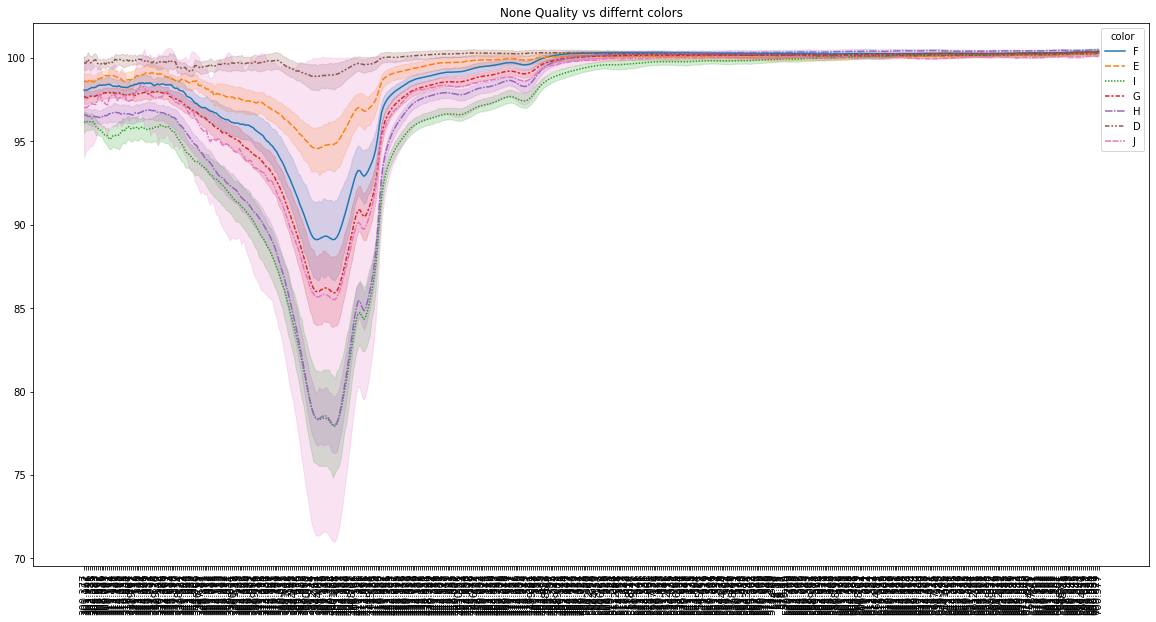

In [46]:
plt.figure(figsize=(20,10))
data2 = data1.set_index(["color"]).T
g1 = sns.lineplot(data=data2, ci=95)
# g1.set(xticklabels=[data1.columns])
g1.set_title('None Quality vs differnt colors')
plt.xticks(rotation = 90)
plt.show()

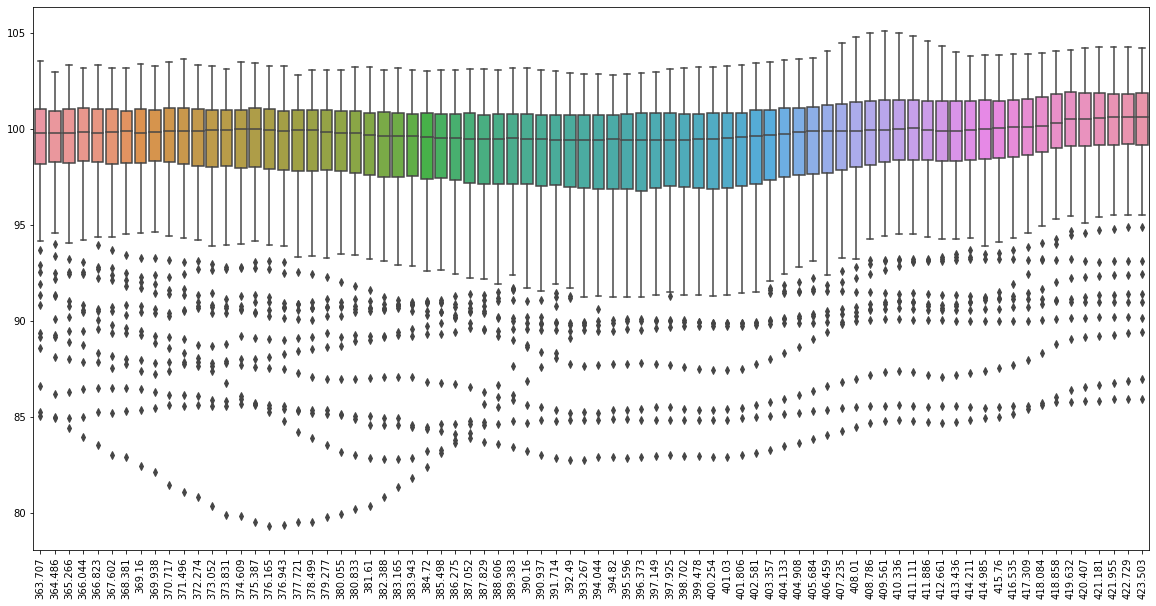

In [35]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data1[data1['color'] == 'D'])
plt.xticks(rotation = 90)
plt.show()

Plotting lineplot of colorwise values of none qualities

In [62]:
plt.figure(figsize=(20,10))
data2 = data2.set_index(["color"]).T
g1 = sns.lineplot(data=data2, ci=99)
# g1.set(xticklabels=[data1.columns])
g1.set_title('None Quality vs differnt colors')
plt.xticks(rotation = 90)
plt.show()

KeyError: "None of ['color'] are in the columns"

<Figure size 1440x720 with 0 Axes>

In [53]:
encoder = LabelEncoder()
df_without_calb_None.iloc[:,-1] = encoder.fit_transform(Y)

Creating Datasets for Training and Testing

In [1339]:
data1.shape

(759, 79)

In [1340]:
X = data1.iloc[:,:-1]
Y = data1.iloc[:,-1]

In [1341]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =42, stratify = Y)

In [1342]:
print(X_train.shape,X_test.shape)

(607, 78) (152, 78)


Creating Stratified K Folds  

In [1344]:
skf =StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

Calculating Weights for each class


In [1343]:
balanced = class_weight.compute_class_weight(class_weight='balanced', classes=data1['color'].value_counts().keys(),y=Y)
balanced = dict(zip(data1['color'].value_counts().keys(),balanced))
balanced

{'G': 0.6520618556701031,
 'F': 0.8547297297297297,
 'H': 1.0541666666666667,
 'D': 1.0541666666666667,
 'E': 1.1294642857142858,
 'I': 1.9461538461538461}

Applying Random Forest

In [1365]:
forest = RandomForestClassifier(class_weight = balanced, oob_score=True)
params = {
    'max_depth': [*range(1, 10)],
    'min_samples_leaf': [*range(1,10,1)],
    'max_features': [*range(35,45,1)],
    'n_estimators': [*range(200, 210, 1)],
    'max_leaf_nodes': [*range(180, 220, 3)],
    'min_samples_split':[2,3,4,5,6]
    }

rand_foresr_CV = RandomizedSearchCV(forest, param_distributions=params , cv = skf, n_iter=50)

In [1366]:

clf = rand_foresr_CV.fit(x_train, Y_train)

In [ ]:
pd.DataFrame(clf.cv_results_)

Applying Extra Trees Classifier

In [976]:
# min_samples_leaf= 1,n_estimators=300,warm_start=True, max_features = 2,criterion = 'entropy',random_state=42, max_depth=15,bootstrap=True, max_samples=140

In [1346]:
et = ExtraTreesClassifier(max_depth=14, min_samples_leaf = 2, max_features='sqrt')
params = {
    # 'max_depth': [*range(10, 25)],
    # 'min_samples_leaf': [*range(1,10,1)],
    # 'max_features': [*range(1,10,1)],
    # 'n_estimators': [*range(90, 120, 2)],
    # 'max_leaf_nodes': [*range(50, 200, 10)],
    # 'min_samples_split':[2,3,4,5,6]
    }


Extra_tress = RandomizedSearchCV(et, param_distributions=params, cv = skf)

In [1356]:
pca = PCA(n_components=5)

In [1357]:
x_train = pca.fit_transform(X_train)

In [1361]:
Extra_tress.fit(x_train, Y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=ExtraTreesClassifier(max_depth=14,
                                                  min_samples_leaf=2),
                   param_distributions={})

In [1362]:
pd.DataFrame(Extra_tress.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.110753,0.004023,0.010757,0.000629,{},0.459016,0.57377,0.46281,0.520661,0.528926,0.509037,0.043267,1


In [1]:
Extra_tress.best_estimator_

NameError: name 'Extra_tress' is not defined

Training The Model

In [1355]:
lst_accu_stratified = []
lst_accu_stratified_train = []
for train_index, test_index in skf.split(X_train, Y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    pca = PCA(n_components=5)
    x_train_fold = pca.fit_transform(x_train_fold)
    x_test_fold = pca.transform(x_test_fold)
    # print(x_train_fold.shape, x_test_fold.shape)

    # fitting the model on training dataset in K fold
    et.fit(x_train_fold, y_train_fold)
        
    # Predicting values
    Y_pred = et.predict(x_test_fold)
    # print(classification_report(y_test_fold, Y_pred))
    lst_accu_stratified.append(et.score(x_test_fold, y_test_fold))
    lst_accu_stratified_train.append(et.score(x_train_fold, y_train_fold))

# Printing accuracies
print('List of possible accuracy:', lst_accu_stratified)
print('List of possible accuracy train:', lst_accu_stratified_train)
print('\nOverall Accuracy:', np.mean(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy train:', np.mean(lst_accu_stratified_train)*100, '%')

List of possible accuracy: [0.5327868852459017, 0.5983606557377049, 0.47107438016528924, 0.5206611570247934, 0.5867768595041323]
List of possible accuracy train: [0.934020618556701, 0.9463917525773196, 0.9238683127572016, 0.9197530864197531, 0.9279835390946503]

Overall Accuracy: 54.19319875355644 %

Overall Accuracy train: 93.04034618811251 %


In [705]:
pickle.dump(et, open('/home/pankaj_v/Documents/Data_analysis_dixit/Models/extra_trees_pca.pkl', 'wb'))

Predicting on test dataset

In [881]:
pca = PCA(n_components=5)
x_test = pca.fit_transform(X_test)

In [882]:
y_preds = et.predict(X_test)

In [883]:
print(classification_report(y_preds, Y_test))

              precision    recall  f1-score   support

           D       0.66      0.75      0.70        44
           E       0.63      0.48      0.55        56
           F       0.49      0.52      0.50        56
           G       0.60      0.39      0.48       122
           H       0.09      0.19      0.12        21
           I       0.29      0.31      0.30        39
           J       0.18      0.29      0.22        14
           K       0.00      0.00      0.00         0

    accuracy                           0.45       352
   macro avg       0.37      0.37      0.36       352
weighted avg       0.51      0.45      0.47       352

